In [37]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [38]:
%cd /content/drive/MyDrive/Assignment 1



/content/drive/MyDrive/Assignment 1


In [39]:
import numpy as np
import pandas as pd

In [43]:
data = pd.read_csv('WHR-2024-5CS037.csv')

In [44]:
# Display the first 10 rows
print("First 10 rows of the dataset:")
print(data.head(10))

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

In [45]:
# Number of rows and columns
print("\nNumber of rows and columns:")
print(data.shape)



Number of rows and columns:
(143, 9)


In [46]:
# List all columns and their data types
print("\nColumns and their data types:")
print(data.dtypes)


Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [47]:
# Calculate mean, median, and standard deviation for the Score column
print("\nBasic Statistics for the Score column:")
print("Mean:", data['score'].mean())
print("Median:", data['score'].median())
print("Standard Deviation:", data['score'].std())


Basic Statistics for the Score column:
Mean: 5.52758041958042
Median: 5.785
Standard Deviation: 1.1707165099442995


In [48]:
# Identify the country with the highest and lowest happiness scores
highest_score_country = data.loc[data['score'].idxmax(), 'Country name']
lowest_score_country = data.loc[data['score'].idxmin(), 'Country name']
print("\nCountry with the highest happiness score:", highest_score_country)
print("Country with the lowest happiness score:", lowest_score_country)


Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


In [49]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [50]:
# Filter countries with Score > 7.5
filtered_data = data[data['score'] > 7.5]
print(filtered_data)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [51]:
# Sort by GDP per Capita in descending order
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)

print("\nTop 10 countries with Score > 7.5 (sorted by GDP per Capita):")
print(sorted_data.head(10))


Top 10 countries with Score > 7.5 (sorted by GDP per Capita):
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [52]:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness Category'] = data['score'].apply(categorize_happiness)

print("\nDataset with Happiness Category column:")
print(data[['Country name', 'score', 'Happiness Category']].head(10))


Dataset with Happiness Category column:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


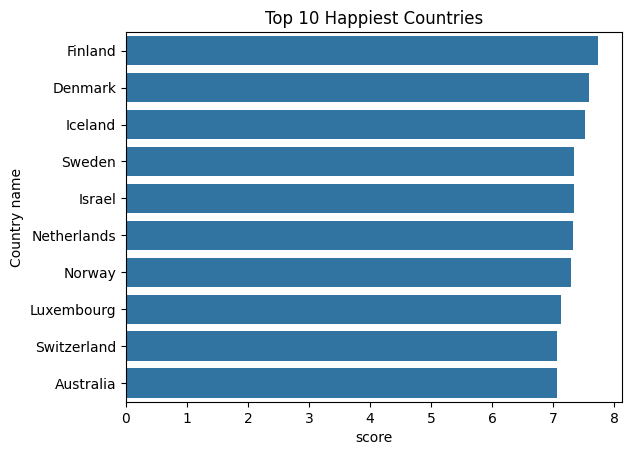

In [55]:
# Bar Plot for Top 10 Happiest Countries
top_10_happiest = data.nlargest(10, 'score')
sns.barplot(x='score', y='Country name', data=top_10_happiest)
plt.title('Top 10 Happiest Countries')
plt.show()

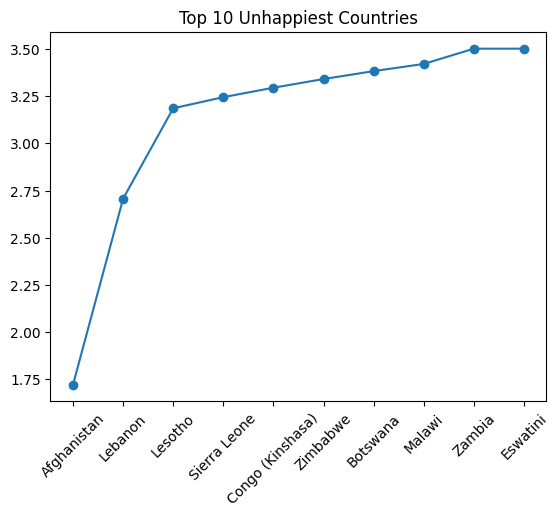

In [56]:
# Line Plot for Top 10 Unhappiest Countries
top_10_unhappiest = data.nsmallest(10, 'score')
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o')
plt.title('Top 10 Unhappiest Countries')
plt.xticks(rotation=45)
plt.show()

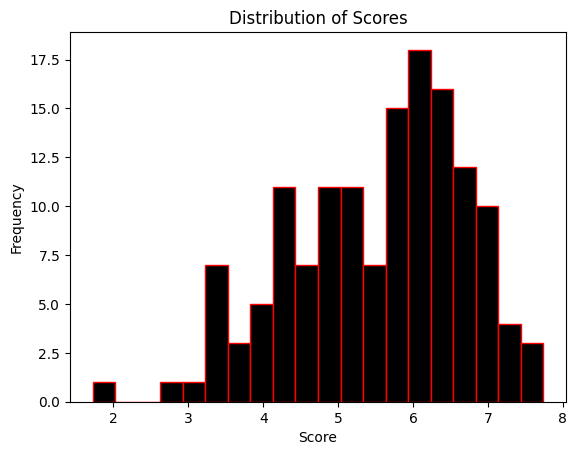

In [60]:
# Histogram for Score column
plt.hist(data['score'], bins=20, color='black', edgecolor='red')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

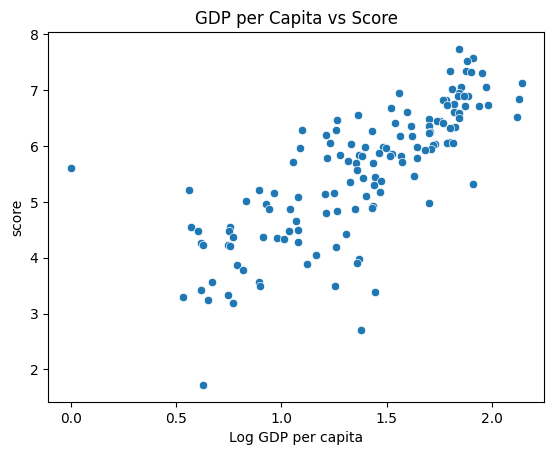

In [63]:
# Scatter Plot for GDP per Capita vs Score
sns.scatterplot(x='Log GDP per capita', y='score', data=data)
plt.title('GDP per Capita vs Score')
plt.show()

In [65]:
# Problem 2: Advanced EDA
# Filter South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia_data = data[data['Country name'].isin(south_asian_countries)]

In [66]:
# Save the filtered dataset
south_asia_data.to_csv('South_Asia_Happiness.csv', index=False)

In [82]:
south_asia_data.loc[:, 'Composite Score'] = (0.4 * south_asia_data['Log GDP per capita'] +
                                            0.3 * south_asia_data['Social support'] +
                                            0.2 * south_asia_data['Healthy life expectancy'])

In [84]:
# Rank by Composite Score
south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)
print("South Asian countries ranked by Composite Score:")
print(south_asia_data[['Country name', 'Composite Score']])

South Asian countries ranked by Composite Score:
    Country name  Composite Score
127    Sri Lanka           1.0153
92         Nepal           0.7716
125        India           0.7457
107     Pakistan           0.6718
128   Bangladesh           0.6261
142  Afghanistan           0.2996


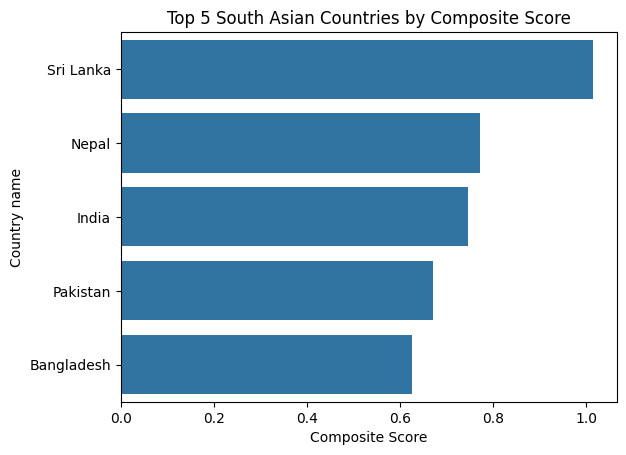

In [86]:
# Visualize Top 5 by Composite Score
sns.barplot(x='Composite Score', y='Country name', data=south_asia_data.head(5))
plt.title('Top 5 South Asian Countries by Composite Score')
plt.show()

In [89]:
# Outlier Detection
q1 = south_asia_data['score'].quantile(0.25)
q3 = south_asia_data['score'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = south_asia_data[(south_asia_data['score'] < lower_bound) | (south_asia_data['score'] > upper_bound)]

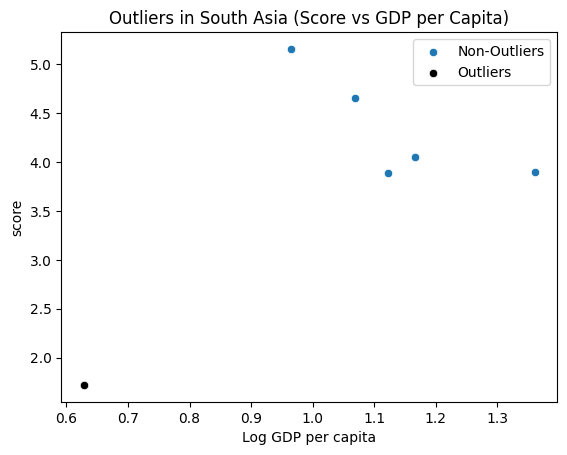

In [100]:
# Scatter Plot with Outliers Highlighted
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, label='Non-Outliers')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='black', label='Outliers')
plt.title('Outliers in South Asia (Score vs GDP per Capita)')
plt.legend()
plt.show()

In [95]:
# Function to detect outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for Score and Log GDP per Capita
score_outliers = detect_outliers(south_asia_data, 'score')
gdp_outliers = detect_outliers(south_asia_data, 'Log GDP per capita')

# Combine outliers
outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# Display outliers
print("Outlier Countries in South Asia:")
print(outliers[['Country name', 'score', 'Log GDP per capita']])

Outlier Countries in South Asia:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


In [96]:
# Function to compute outliers using the 1.5 × IQR rule
def compute_outliers(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return lower_bound, upper_bound, outliers


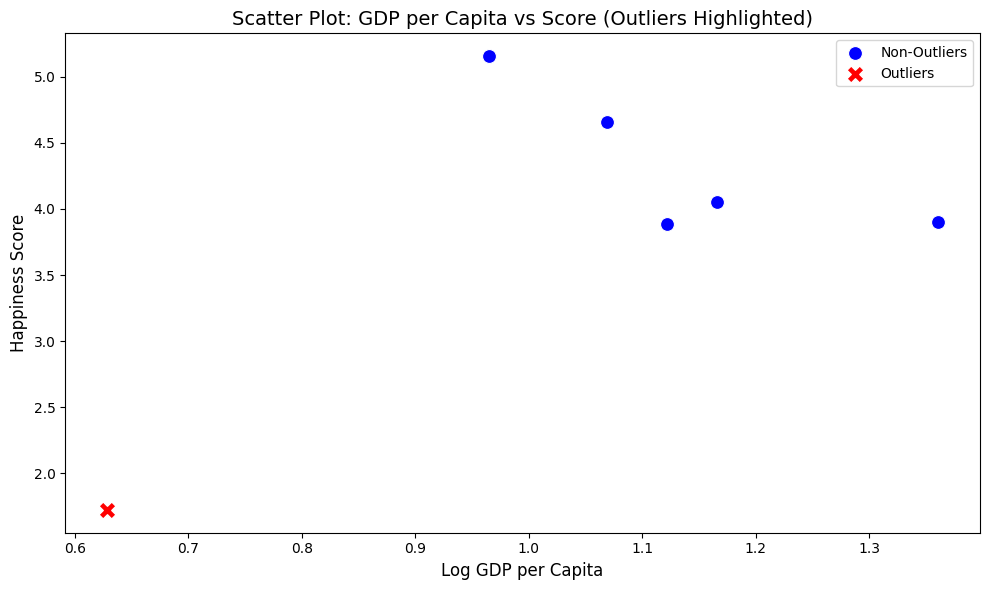

In [99]:
# Scatter Plot: GDP per Capita vs. Score with Outliers Highlighted
plt.figure(figsize=(10, 6))

# Plot non-outliers
non_outliers = south_asia_data[~south_asia_data['Country name'].isin(pd.concat([gdp_outliers, score_outliers])['Country name'])]
sns.scatterplot(x='Log GDP per capita', y='score', data=non_outliers, color='blue', label='Non-Outliers', s=100)

# Plot outliers
outliers_combined = pd.concat([gdp_outliers, score_outliers]).drop_duplicates()
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_combined, color='red', label='Outliers', s=150, marker='X')

# Titles and labels
plt.title('Scatter Plot: GDP per Capita vs Score (Outliers Highlighted)', fontsize=14)
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


In [109]:
# Task 4: Exploring Trends Across Metrics
# 1. Calculate Pearson correlation for selected metrics
metrics = ['Freedom to make life choices', 'Generosity']
for metric in metrics:
    correlation = south_asia_data[metric].corr(south_asia_data['score'])
    print(f"Pearson correlation between {metric} and Score: {correlation:.2f}")

Pearson correlation between Freedom to make life choices and Score: 0.80
Pearson correlation between Generosity and Score: 0.87


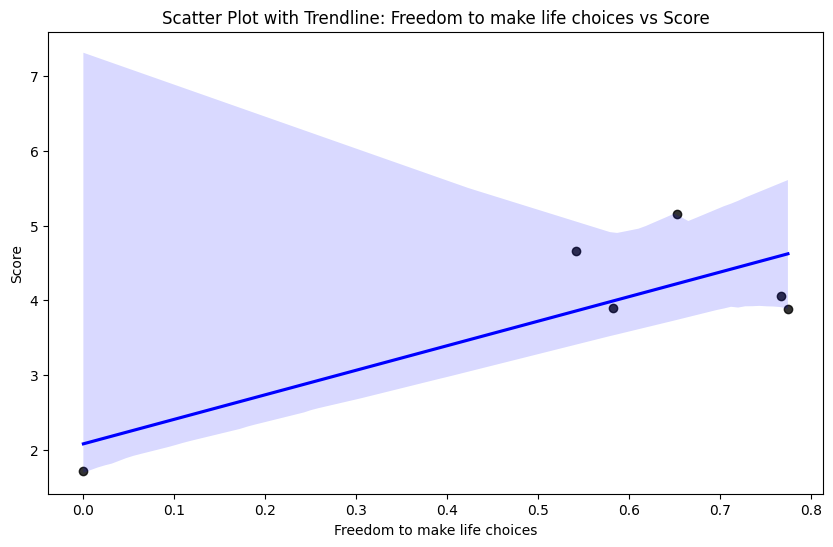

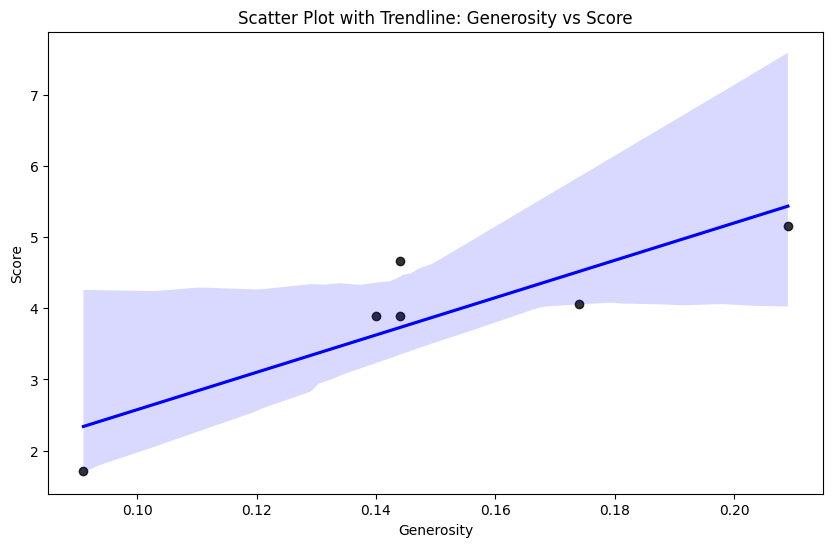

In [112]:
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=metric, y='score', data=south_asia_data, scatter_kws={'color': 'black'}, line_kws={'color': 'blue'})
    plt.title(f'Scatter Plot with Trendline: {metric} vs Score')
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.show()

In [117]:
# 1. Add a new column for GDP-Score Gap
south_asia_data.loc[:, 'GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

In [118]:
# 2. Rank countries by GDP-Score Gap in ascending and descending order
gap_sorted_asc = south_asia_data.sort_values(by='GDP-Score Gap')
gap_sorted_desc = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)

In [119]:
# 2. Rank countries by GDP-Score Gap in ascending and descending order
gap_sorted_asc = south_asia_data.sort_values(by='GDP-Score Gap')
gap_sorted_desc = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)

In [120]:
# 3. Bar chart for top 3 countries with largest positive and negative gaps
top_3_positive_gap = gap_sorted_desc.head(3)
top_3_negative_gap = gap_sorted_asc.head(3)

<ipython-input-121-a089a687abaa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([top_3_positive_gap, top_3_negative_gap]), palette='Spectral')


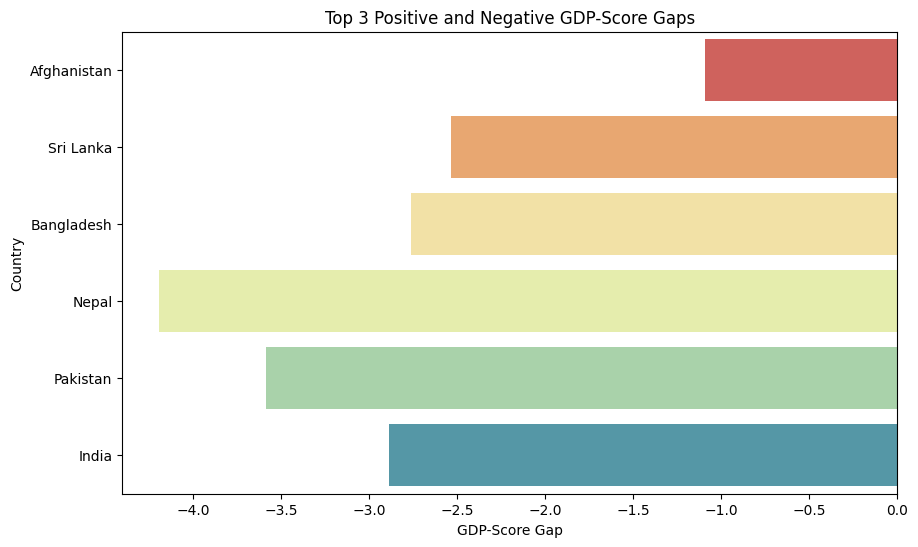

In [121]:
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([top_3_positive_gap, top_3_negative_gap]), palette='Spectral')
plt.title('Top 3 Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

In [122]:
# 4. Analysis of gaps
print("\nAnalysis of GDP-Score Gaps:")
print("Top 3 Positive Gaps:")
print(top_3_positive_gap[['Country name', 'GDP-Score Gap']])
print("\nTop 3 Negative Gaps:")
print(top_3_negative_gap[['Country name', 'GDP-Score Gap']])


Analysis of GDP-Score Gaps:
Top 3 Positive Gaps:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 Negative Gaps:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


In [123]:
# Define Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon","Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

In [124]:
# Filter dataset for Middle Eastern countries
middle_east_data = data[data['Country name'].isin(middle_east_countries)]
middle_east_data = middle_east_data.copy()

In [125]:
# Save Middle Eastern dataset for future use
middle_east_data.to_csv('MiddleEast_Happiness.csv', index=False)
print("Filtered Middle Eastern dataset saved as 'MiddleEast_Happiness.csv'")

Filtered Middle Eastern dataset saved as 'MiddleEast_Happiness.csv'


In [126]:
# 1. Descriptive Statistics
# Calculate mean and standard deviation of Score for South Asia and Middle East
south_asia_mean = south_asia_data['score'].mean()
south_asia_std = south_asia_data['score'].std()
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

print(f"South Asia - Mean Score: {south_asia_mean:.2f}, Std Dev: {south_asia_std:.2f}")
print(f"Middle East - Mean Score: {middle_east_mean:.2f}, Std Dev: {middle_east_std:.2f}")

# Which region has higher happiness scores on average?
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")

South Asia - Mean Score: 3.90, Std Dev: 1.18
Middle East - Mean Score: 5.41, Std Dev: 1.57
Middle East has a higher average happiness score.


<ipython-input-127-623779bf2572>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([south_asia_top3, south_asia_bottom3]), palette='viridis')
<ipython-input-127-623779bf2572>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([middle_east_top3, middle_east_bottom3]), palette='plasma')


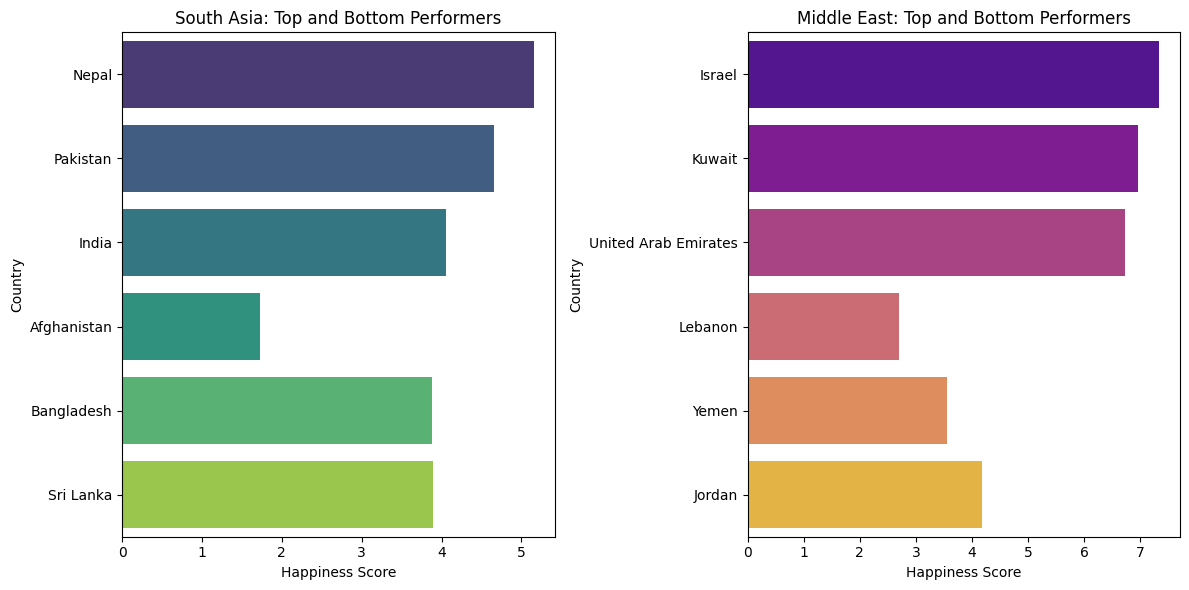

In [127]:
# 2. Top and Bottom Performers
# Identify top 3 and bottom 3 countries by Score in each region
south_asia_top3 = south_asia_data.nlargest(3, 'score')
south_asia_bottom3 = south_asia_data.nsmallest(3, 'score')
middle_east_top3 = middle_east_data.nlargest(3, 'score')
middle_east_bottom3 = middle_east_data.nsmallest(3, 'score')

# Bar chart for top 3 and bottom 3 countries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=pd.concat([south_asia_top3, south_asia_bottom3]), palette='viridis')
plt.title('South Asia: Top and Bottom Performers')
plt.xlabel('Happiness Score')
plt.ylabel('Country')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=pd.concat([middle_east_top3, middle_east_bottom3]), palette='plasma')
plt.title('Middle East: Top and Bottom Performers')
plt.xlabel('Happiness Score')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

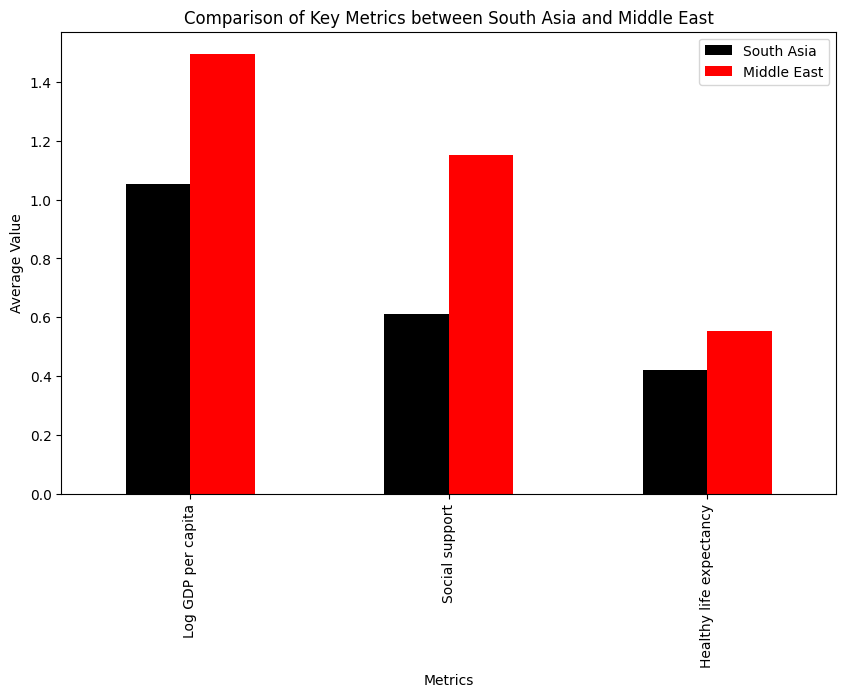

Metric with largest disparity: Social support


In [131]:
# 3. Metric Comparisons
# Grouped bar chart for key metrics
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_means = south_asia_data[metrics].mean()
middle_east_means = middle_east_data[metrics].mean()

comparison_df = pd.DataFrame({'South Asia': south_asia_means, 'Middle East': middle_east_means})
comparison_df.plot(kind='bar', figsize=(10, 6), color=['black', 'red'])
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.ylabel('Average Value')
plt.xlabel('Metrics')
plt.legend()
plt.show()

# Which metric shows the largest disparity?
disparity = (middle_east_means - south_asia_means).abs()
print("Metric with largest disparity:", disparity.idxmax())

In [132]:

# 4. Happiness Disparity
# Compute range and coefficient of variation for Score
south_asia_range = south_asia_data['score'].max() - south_asia_data['score'].min()
middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()

south_asia_cv = south_asia_std / south_asia_mean
middle_east_cv = middle_east_std / middle_east_mean

print(f"South Asia - Range: {south_asia_range:.2f}, Coefficient of Variation: {south_asia_cv:.2f}")
print(f"Middle East - Range: {middle_east_range:.2f}, Coefficient of Variation: {middle_east_cv:.2f}")

# Which region has greater variability?
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness scores.")
else:
    print("Middle East has greater variability in happiness scores.")

South Asia - Range: 3.44, Coefficient of Variation: 0.30
Middle East - Range: 4.63, Coefficient of Variation: 0.29
South Asia has greater variability in happiness scores.


Correlation of Score with Freedom to make life choices in South Asia: 0.80
Correlation of Score with Freedom to make life choices in Middle East: 0.86
Correlation of Score with Generosity in South Asia: 0.87
Correlation of Score with Generosity in Middle East: 0.63


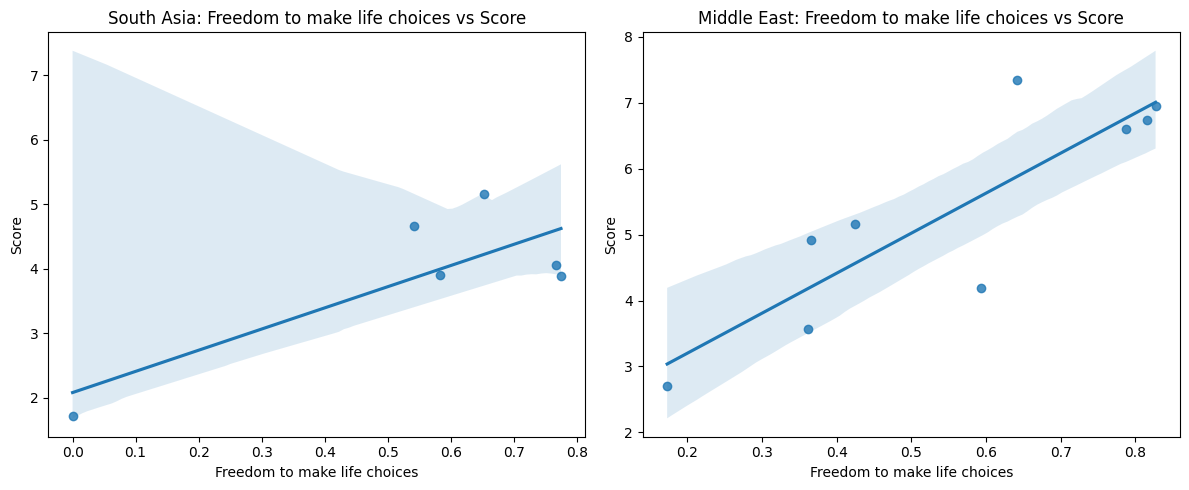

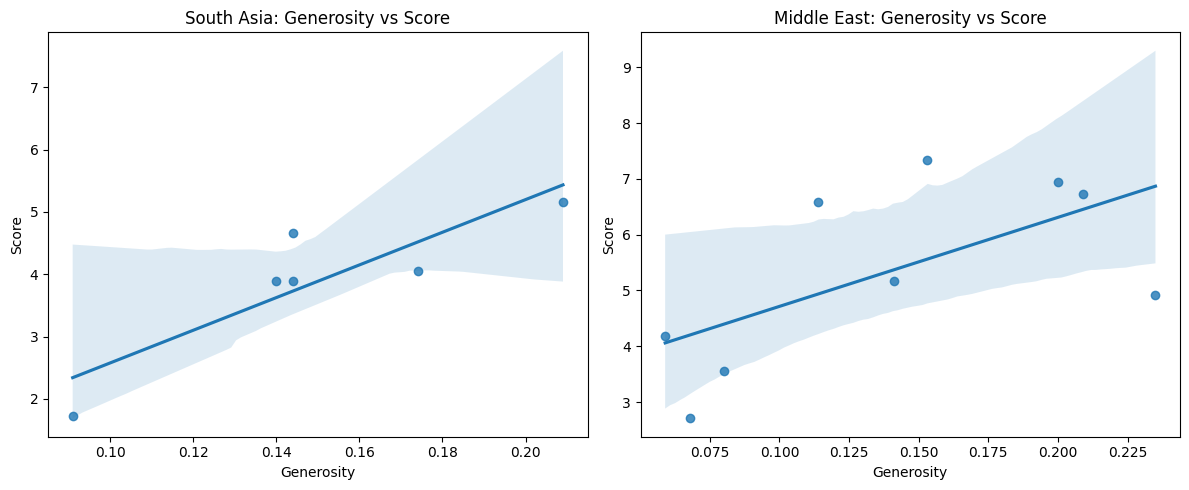

In [133]:
# 5. Correlation Analysis
# Correlation of Score with selected metrics
metrics_to_analyze = ['Freedom to make life choices', 'Generosity']
for metric in metrics_to_analyze:
    south_asia_corr = south_asia_data['score'].corr(south_asia_data[metric])
    middle_east_corr = middle_east_data['score'].corr(middle_east_data[metric])
    print(f"Correlation of Score with {metric} in South Asia: {south_asia_corr:.2f}")
    print(f"Correlation of Score with {metric} in Middle East: {middle_east_corr:.2f}")

# Scatter plots for correlations
for metric in metrics_to_analyze:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.regplot(x=metric, y='score', data=south_asia_data)
    plt.title(f'South Asia: {metric} vs Score')
    plt.xlabel(metric)
    plt.ylabel('Score')

    plt.subplot(1, 2, 2)
    sns.regplot(x=metric, y='score', data=middle_east_data)
    plt.title(f'Middle East: {metric} vs Score')
    plt.xlabel(metric)
    plt.ylabel('Score')

    plt.tight_layout()
    plt.show()

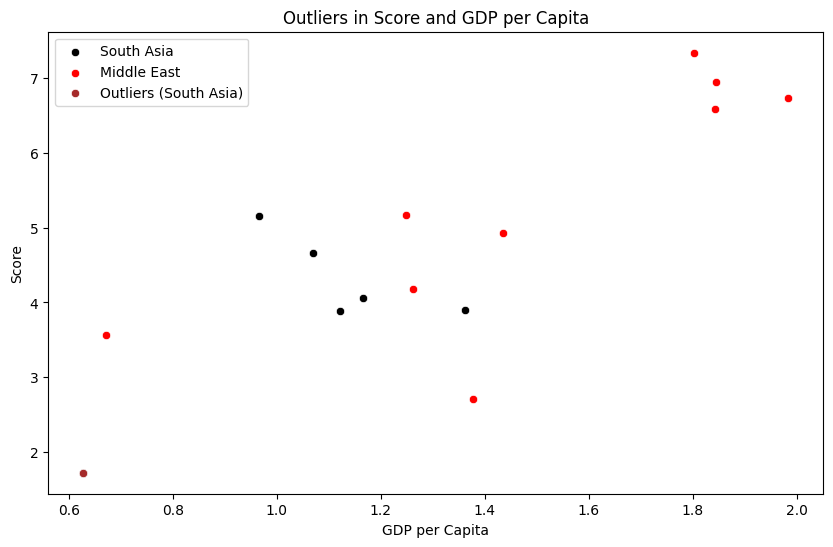

In [134]:

# 6. Outlier Detection
# Detect outliers in both regions
def detect_outliers(column, region_data):
    Q1 = region_data[column].quantile(0.25)
    Q3 = region_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return region_data[(region_data[column] < lower_bound) | (region_data[column] > upper_bound)]

south_asia_outliers = detect_outliers('score', south_asia_data)
middle_east_outliers = detect_outliers('score', middle_east_data)

# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, color='black', label='South Asia')
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, color='red', label='Middle East')
sns.scatterplot(x=south_asia_outliers['Log GDP per capita'], y=south_asia_outliers['score'], color='brown', label='Outliers (South Asia)')
sns.scatterplot(x=middle_east_outliers['Log GDP per capita'], y=middle_east_outliers['score'], color='pink', label='Outliers (Middle East)')
plt.title('Outliers in Score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

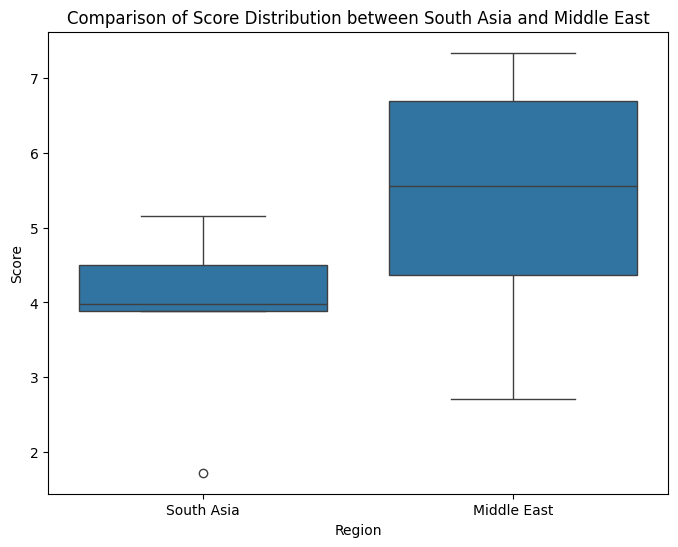

In [135]:
# 7. Visualization: Boxplot Comparison
# Boxplot for Score distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([
    south_asia_data.assign(Region='South Asia'),
    middle_east_data.assign(Region='Middle East')
]))
plt.title('Comparison of Score Distribution between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()